<u><b>Computer Vision

<u><b>Name: Honey Singh</b></u>

<u><b>Registration No: 12419051622 </b></u>

<u><b>Lab - 3 : </b></u> Image Enhancement using Spatial Filtering

# Objectives:

The objective of this lab is to introduce the student to OpenCV/python, especially for image processing.


1.   To Understand convolution operation in images
2.   To study various spatial filters
3.   Edge detection using gradient and Laplacian operator
4.   Laplacian of Gaussian (LoG)









# Reading and displaying an image in python

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

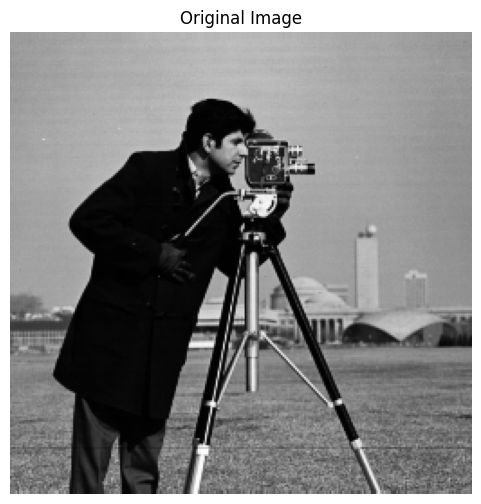

In [33]:
img = cv2.imread(r'H:\My Drive\U.S.A.R\6th Semester\Lab\cameraman.tif', cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Averaging/smoothing mask on image

Averaging or smoothing is a spatial domain filtering technique used to reduce noise and smoothen an image. It involves applying a kernel (filter mask) to the image, where each pixel's value is replaced by the average of its neighboring pixel values within the kernel. This process helps in reducing sharp transitions in intensity, making the image appear smoother. However, it may also blur fine details and edges in the image.
```

In [34]:
# Step 2: Averaging/Smoothing Mask
kernel_size = 3  # Define kernel size
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

In [35]:
# Apply filter manually
h, w = img.shape
smoothed_img = np.zeros((h, w), dtype=np.uint8)
pad = kernel_size // 2
padded_img = np.pad(img, pad, mode='constant', constant_values=0)  # Zero padding

In [36]:
for i in range(h):
    for j in range(w):
        region = padded_img[i:i+kernel_size, j:j+kernel_size]
        smoothed_img[i, j] = np.sum(region * kernel)  # Apply averaging mask


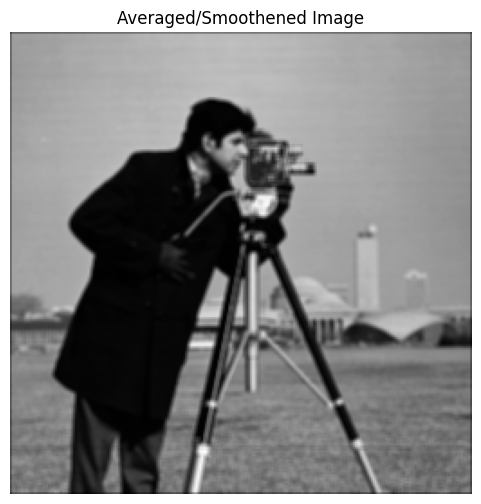

In [37]:
plt.figure(figsize=(6,6))
plt.imshow(smoothed_img, cmap='gray')
plt.title('Averaged/Smoothened Image')
plt.axis('off')
plt.show()

# Averaging Mask for Noise Removal

An averaging mask is a spatial filtering technique used to reduce noise in images. It works by replacing each pixel's value with the average of its neighboring pixel values within a defined kernel (e.g., 3x3, 5x5). This process smoothens the image by reducing sharp intensity variations caused by noise. 

The kernel is a matrix where each element has equal weight (e.g., 1/9 for a 3x3 kernel). The mask slides over the image, and for each pixel, the weighted sum of the overlapping region is calculated and assigned to the center pixel. While effective in reducing random noise, this method can also blur fine details and edges in the image.

In [38]:
# Step 3: Averaging Mask for Noise Removal (Same as smoothing but useful in noisy images)
noise_removed_img = np.zeros((h, w), dtype=np.uint8)

In [39]:
for i in range(h):
    for j in range(w):
        region = padded_img[i:i+kernel_size, j:j+kernel_size]
        noise_removed_img[i, j] = np.sum(region * kernel)  # Apply again



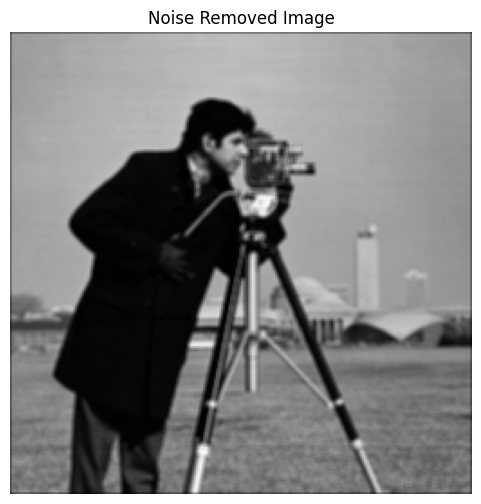

In [40]:
plt.figure(figsize=(6,6))
plt.imshow(noise_removed_img, cmap='gray')
plt.title('Noise Removed Image')
plt.axis('off')
plt.show()

##  Median Filter for Salt and Pepper Noise

Median filtering is a non-linear spatial filtering technique used to reduce noise in images, particularly effective for removing salt-and-pepper noise. Salt-and-pepper noise appears as random occurrences of white and black pixels in an image. 

The median filter works by replacing each pixel's value with the median value of the intensities in its neighborhood, defined by a kernel (e.g., 3x3, 5x5). The median is calculated by sorting the pixel values in the kernel and selecting the middle value. This process preserves edges better than averaging filters, as it does not introduce new intensity levels and is less sensitive to outliers. 

The steps to apply a median filter are:
1. Define the kernel size (e.g., 3x3).
2. Slide the kernel over the image.
3. For each pixel, compute the median of the pixel values in the kernel and assign it to the center pixel.
4. Repeat for all pixels in the image.

In [41]:
# Step 4: Median Filter for Salt and Pepper Noise
median_filtered_img = np.zeros((h, w), dtype=np.uint8)

In [42]:
for i in range(h):
    for j in range(w):
        region = padded_img[i:i+kernel_size, j:j+kernel_size]
        median_filtered_img[i, j] = np.median(region)  # Apply median filter

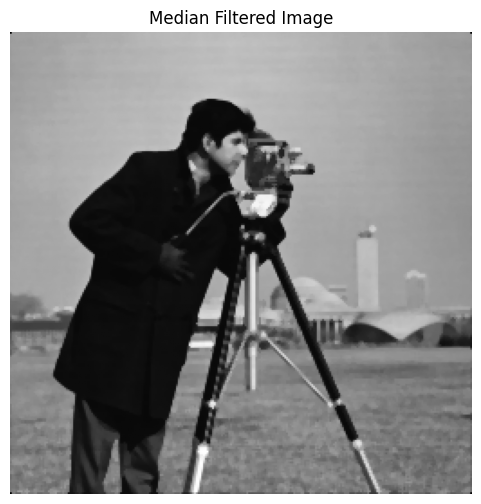

In [43]:
plt.figure(figsize=(6,6))
plt.imshow(median_filtered_img, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()

# Conclusion

In this lab, we explored various spatial domain filtering techniques for image enhancement and noise removal. The key takeaways are:

1. **Averaging/Smoothing Filter**: This technique effectively reduces noise and smoothens the image by replacing each pixel's value with the average of its neighbors. However, it can blur fine details and edges.

2. **Averaging Mask for Noise Removal**: Similar to smoothing, this method is particularly useful for reducing random noise in images. It helps in achieving a cleaner image but may compromise edge sharpness.

3. **Median Filter**: A non-linear filtering technique that is highly effective in removing salt-and-pepper noise. Unlike averaging, it preserves edges and fine details by replacing each pixel's value with the median of its neighborhood.

These techniques demonstrate the importance of spatial domain filtering in image processing, allowing us to enhance image quality and reduce noise while balancing the trade-offs between smoothness and detail preservation.
